<a href="https://colab.research.google.com/github/maricamolesi/Iniciacao-Cientifica/blob/master/Automatos_Celulares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
"""
Created on Thu Nov 21 16:47:32 2019

@author: Mariana Camolesi

"""

from os import listdir
from os.path import isfile, join
from PIL import Image
import numpy as np
import os


**CARREGAMENTO DO BANCO DE IMAGENS**

In [ ]:
MYPATH = 'CAMINHO DA PASTA DO BANCO DE IMAGENS'
NEWPATH = 'CAMINHO DA NOVA PASTA'
ONLYFILES = [f for f in listdir(MYPATH) if isfile(join(MYPATH, f))]

**ENTRADA DOS PARÂMETROS**

In [ ]:
V = int(input('Surface roughness v: '))
GAMMA = float(input('Pitting power γ: '))
INT = int(input('Number of iterations: '))

**CORROSÃO E CÁLCULO DA MATRIZ DE VETORES CARACTERÍSTICOS**



In [ ]:
#Matriz dos vetores característicos
FEATURE_MATRIX = np.zeros((len(ONLYFILES), (INT)))

#Acesso a cada imagem da pasta
for n in range(len(ONLYFILES)):

    image = Image.open(join(MYPATH, ONLYFILES[n]))

    #Add linhas e colunas imaginarias
    left = np.insert(image, 0, values=0, axis=1)
    right = np.insert(left, left.shape[1], values=0, axis=1)
    top = np.insert(right, 0, values=0, axis=0)
    image = np.insert(top, top.shape[0], values=0, axis=0)

    row, col = image.shape

    s = np.zeros((row, col, INT+1))   #Matriz dos estados das células
    d = 0                             #Diferença do estado e o menor valor da vizinhança
    Q = 0                             #Corrosão
    Q_total = 0

    #Associação da imagem original aos estados no t=0
    for i in range(row):
        for j in range(col):
            s[i, j, 0] = image[i, j]

    for t in range(INT):

        #Condição de contorno
        for i in range(col):
            s[0, i, t] = s[1, i, t]
            s[row-1, i, t] = s[row-2, i, t]
        for i in range(row):
            s[i, 0, t] = s[i, 1, t]
            s[i, col-1, t] = s[i, col-2, t]

        #Corrosao da imagem
        for i in range(1, row-1):
            for j in range(1, col-1):
                smin = s[i-1, j-1, t]
                for k in range(i-1, i+2):
                    for m in range(j-1, j+2):
                        if (s[k, m, t] <= smin):
                            smin = s[k, m, t]
                d = s[i, j, t] - smin

                if (d < V or d > 255):
                    s[i, j, t+1] = s[i, j, t]
                else:
                    Q = int((255 - d) * GAMMA)
                    s[i, j, t+1] = s[i, j, t] + Q
                    Q_total += Q

        FEATURE_MATRIX[n, t] = Q_total/(row*col)

    #Normalizar e salvar imagens corroídas em nova pasta
    corroded_image = s[:, :, t]*255/np.amax(s[:, :, t])
    corroded_image = Image.fromarray((corroded_image).astype(np.uint8))
    file_path = os.path.join(NEWPATH, ONLYFILES[n])
    corroded_image.save(file_path)
    

**DOWNLOAD .CSV DA MATRIZ CARACTERÍSTICA**

In [ ]:
from numpy import savetxt
savetxt('NOME DE INTERESSE', FEATURE_MATRIX)

from google.colab import files
files.download('NOME DE INTERESSE')

**EXEMPLOS DE DIFERENTES NÍVEIS DE CORROSÃO DO BANCO DE IMAGENS**

Imagens originais:

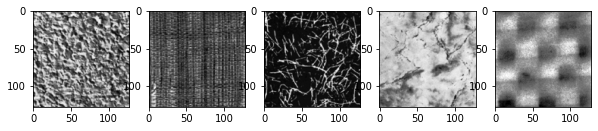

In [141]:
MYPATH = '/content/Brodatz_128x128'
ONLYFILES = [f for f in listdir(MYPATH) if isfile(join(MYPATH, f))]

fig = plt.figure(figsize = (10, 10))
columns = 5
rows = 1

for i in range(1, columns*rows +1):
    img = Image.open(join(MYPATH, ONLYFILES[i]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')

plt.show()


Imagens com parâmetros v = 10, gamma = 0.01 e 30 iterações.

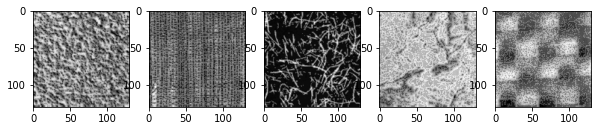

In [142]:
MYPATH = '/content/v10gamma001int30'
ONLYFILES = [f for f in listdir(MYPATH) if isfile(join(MYPATH, f))]

fig = plt.figure(figsize = (10, 10))
columns = 5
rows = 1

for i in range(1, columns*rows +1):
    img = Image.open(join(MYPATH, ONLYFILES[i]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')

plt.show()

Imagens com parâmetros v = 5, gamma = 0.05 e 90 iterações.

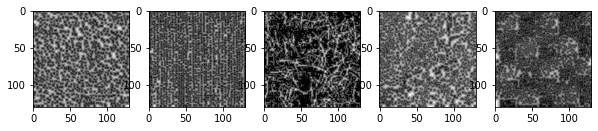

In [143]:
MYPATH = '/content/v5gamma005int90'
ONLYFILES = [f for f in listdir(MYPATH) if isfile(join(MYPATH, f))]

fig = plt.figure(figsize = (10, 10))
columns = 5
rows = 1

for i in range(1, columns*rows +1):
    img = Image.open(join(MYPATH, ONLYFILES[i]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')

plt.show()

Imagens com parâmetros v = 1, gamma = 0.05 e 158 iterações.

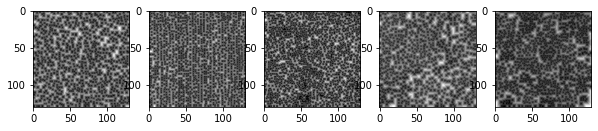

In [144]:
MYPATH = '/content/v1gamma005int158'
ONLYFILES = [f for f in listdir(MYPATH) if isfile(join(MYPATH, f))]

fig = plt.figure(figsize = (10, 10))
columns = 5
rows = 1

for i in range(1, columns*rows +1):
    img = Image.open(join(MYPATH, ONLYFILES[i]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')

plt.show()